# European Soccer Dataset - Data Analysis

by Salih Kilicli

The data set can be found at https://www.kaggle.com/hugomathien/soccer.

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='rainbow')

Let's create a connection to an SQLite database specified by database.sqlite european soccer dataset file.

In [2]:
path = "./Documents/Python/DataSets/database.sqlite"
connection = sqlite3.connect(path)

In [3]:
tables = ["League", "Match", "Team", "Player", "Team_Attributes", "Player_Attributes"]

In [4]:
league = pd.read_sql_query("SELECT * FROM {}".format(tables[0]), connection)
print(league.info())
league[['id', 'name']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None


,id,name
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A
5,13274,Netherlands Eredivisie
6,15722,Poland Ekstraklasa
7,17642,Portugal Liga ZON Sagres
8,19694,Scotland Premier League
9,21518,Spain LIGA BBVA


In [5]:
match = pd.read_sql_query("SELECT * FROM {}".format(tables[1]), connection)
match = match.drop(["id","country_id"], axis=1)
print(match.info())
match.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 113 entries, league_id to BSA
dtypes: float64(96), int64(7), object(10)
memory usage: 22.4+ MB
None


,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


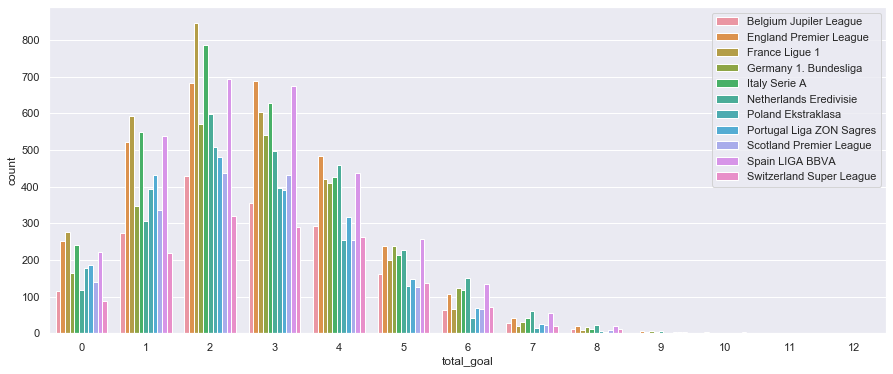

In [6]:
total_goal = match.home_team_goal + match.away_team_goal
match["total_goal"] = total_goal
d = {1: 'Belgium Jupiler League',
     1729: 'England Premier League',
     4769: 'France Ligue 1',
     7809: 'Germany 1. Bundesliga',
     10257: 'Italy Serie A',
     13274: 'Netherlands Eredivisie',
     15722: 'Poland Ekstraklasa',
     17642: 'Portugal Liga ZON Sagres',
     19694: 'Scotland Premier League',
     21518: 'Spain LIGA BBVA',
     24558: 'Switzerland Super League'}

plt.figure(figsize=(15, 6))
sns.countplot(x="total_goal", hue="league_id", data=match)
plt.legend(loc='upper right', labels=d.values())

In [7]:
team = pd.read_sql_query("SELECT * FROM {}".format(tables[2]), connection)
print(team.info())
team.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
tables = ["League", "Match", "Team", "Player", "Team_Attributes", "Player_Attributes"]
team_att = pd.read_sql_query("SELECT * FROM {}".format(tables[4]), connection)
team_att.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [9]:
player = pd.read_sql_query("SELECT * FROM {}".format(tables[3]), connection)
player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


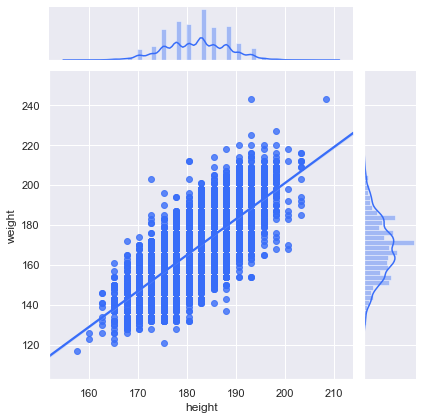

In [10]:
sns.jointplot(x="height", y="weight", data=player, kind='reg')

In [11]:
tables = ["League", "Match", "Team", "Player", "Team_Attributes", "Player_Attributes"]
player_att = pd.read_sql_query("SELECT * FROM {}".format(tables[5]), connection)
player_att.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


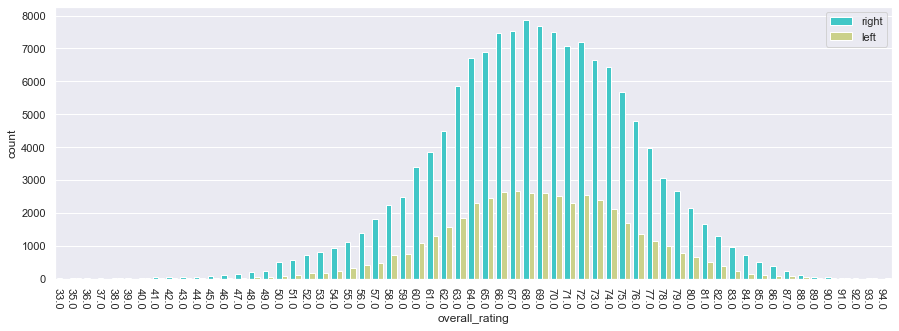

In [12]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="overall_rating", hue="preferred_foot", data=player_att, palette="rainbow")
ax.set_xticklabels(ax.get_xticklabels(), rotation=270, ha="right")
plt.legend(loc='upper right')

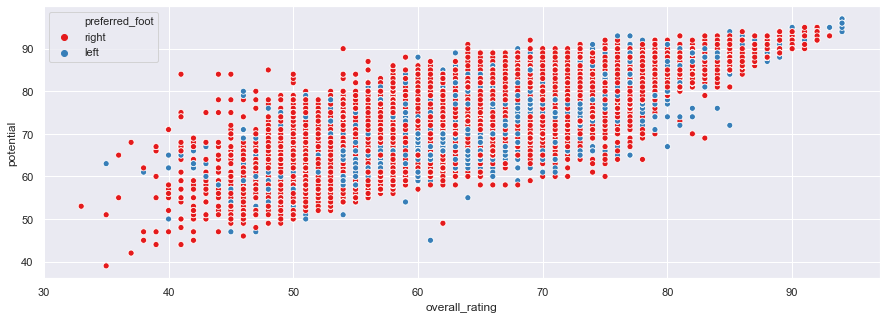

In [13]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="overall_rating", y="potential", hue="preferred_foot", data=player_att, palette='Set1')